In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics

In [2]:
csv_data = pd.read_csv('database_8f.csv')
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,7,4.218388,0.658659,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,7,4.039544,0.664035,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,24,12.329679,0.734958,5.047266,1.000000,0.000000,0.000000,1.000000,0
3,10,10.854882,0.676083,4.867942,1.000000,0.000000,0.000000,1.000000,0
4,11,8.830020,0.640324,4.548501,1.000000,0.000000,0.000000,1.000000,0
5,10,10.374794,0.669042,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,11,18.659241,0.725560,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,7,4.420097,0.720220,3.611113,1.000000,0.000000,0.000000,1.000000,0
8,6,5.418079,0.758399,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,6,4.433054,0.732694,3.631464,1.000000,0.000000,0.000000,1.000000,0


In [3]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
count,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000
mean,88.818920,21.511299,0.398281,5.116770,0.719577,0.070056,0.559147,0.965003,0.674057
std,62.582484,17.369348,0.402660,0.965350,0.251420,0.072683,0.484133,0.036301,0.695438
min,0.000000,2.161411,0.016316,1.996114,0.173564,0.000000,0.000000,0.811594,0.000000
25%,12.000000,7.160578,0.100237,4.303568,0.478168,0.000000,0.000000,0.943841,0.000000
50%,112.000000,16.586874,0.200626,5.212415,0.750158,0.048913,0.548345,0.975543,1.000000
75%,137.000000,29.240006,0.608145,5.844652,1.000000,0.112319,0.958206,1.000000,1.000000
max,193.000000,100.997025,1.979039,7.211319,1.000000,0.376812,1.852443,1.000000,2.000000


### 判斷是否有data leagage

In [18]:
#直方圖眾數不可能

HG_std_success = csv_data.HG_std[csv_data.label==0]
HG_std_unsuccess = csv_data.HG_std[csv_data.label==1]
HG_std_back = csv_data.HG_std[csv_data.label==2]

print("對於HG標準差而言")
print('HG_std_success: %.2f' \
      %((HG_std_success <= 7.0).mean()))
print('HG_std_unsuccess: %.2f' \
      %((HG_std_unsuccess <= 7.0).mean()))
print('HG_std_back: %.2f' \
      %((HG_std_back <= 7.0).mean()))
print()
print('HG_std_success: %.2f' \
      %((HG_std_success >= 27.0).mean()))
print('HG_std_unsuccess: %.2f' \
      %((HG_std_unsuccess >= 27.0).mean()))
print('HG_std_back: %.2f' \
      %((HG_std_back >= 27.0).mean()))

print("雖然對於背景狀態來說 值很明顯是偏小的那端 但沒有很極端故不算是")

對於HG標準差而言
HG_std_success: 0.35
HG_std_unsuccess: 0.00
HG_std_back: 0.61

HG_std_success: 0.27
HG_std_unsuccess: 0.37
HG_std_back: 0.00
雖然對於背景狀態來說 值很明顯是偏小的那端 但沒有很極端故不算是


In [19]:
HG_val_success = csv_data.HG_val[csv_data.label==0]
HG_val_unsuccess = csv_data.HG_val[csv_data.label==1]
HG_val_back = csv_data.HG_val[csv_data.label==2]

print("對於HG變異數而言")
print('HG_val_success: %.2f' \
      %((HG_val_success <= 0.09).mean()))
print('HG_val_unsuccess: %.2f' \
      %((HG_val_unsuccess <= 0.09).mean()))
print('HG_val_back: %.2f' \
      %((HG_val_back <= 0.09).mean()))
print()
print('HG_val_success: %.2f' \
      %((HG_val_success >= 0.55).mean()))
print('HG_val_unsuccess: %.2f' \
      %((HG_val_unsuccess >= 0.55).mean()))
print('HG_val_back: %.2f' \
      %((HG_val_back >= 0.55).mean()))
print("雖然對於背景狀態來說 值很明顯是偏小的那端!!!")

對於HG變異數而言
HG_val_success: 0.15
HG_val_unsuccess: 0.05
HG_val_back: 0.94

HG_val_success: 0.26
HG_val_unsuccess: 0.36
HG_val_back: 0.00
雖然對於背景狀態來說 值很明顯是偏小的那端!!!


In [20]:
HG_entropy_success = csv_data.HG_entropy[csv_data.label==0]
HG_entropy_unsuccess = csv_data.HG_entropy[csv_data.label==1]
HG_entropy_back = csv_data.HG_entropy[csv_data.label==2]


print("對於HG_entropy而言")
print('HG_entropy_success: %.2f' \
      %((HG_entropy_success <= 4.0).mean()))
print('HG_entropy_unsuccess: %.2f' \
      %((HG_entropy_unsuccess <= 4.0).mean()))
print('HG_entropy_back: %.2f' \
      %((HG_entropy_back <= 4.0).mean()))
print()
print('HG_entropy_success: %.2f' \
      %((HG_entropy_success >= 6.0).mean()))
print('HG_entropy_unsuccess: %.2f' \
      %((HG_entropy_unsuccess >= 6.0).mean()))
print('HG_entropy_back: %.2f' \
      %((HG_entropy_back >= 6.0).mean()))
print("正常")

對於HG_entropy而言
HG_entropy_success: 0.29
HG_entropy_unsuccess: 0.00
HG_entropy_back: 0.15

HG_entropy_success: 0.09
HG_entropy_unsuccess: 0.37
HG_entropy_back: 0.00
正常


In [21]:
GLCM_entropt_success = csv_data.GLCM_entropt[csv_data.label==0]
GLCM_entropt_unsuccess = csv_data.GLCM_entropt[csv_data.label==1]
GLCM_entropt_back = csv_data.GLCM_entropt[csv_data.label==2]

print("對於GLCM 熵而言")
print('GLCM_entropt_success: %.2f' \
      %((GLCM_entropt_success == 0).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_entropt_unsuccess == 0).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_entropt_back == 0).mean()))
print()
print('GLCM_entropt_success: %.2f' \
      %((GLCM_entropt_success >= 1.0).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_entropt_unsuccess >= 1.0).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_entropt_back >= 1.0).mean()))
print("正常")

對於GLCM 熵而言
GLCM_entropt_success: 0.43
GLCM_entroptt_unsuccess: 0.02
GLCM_entropt_back: 0.37

GLCM_entropt_success: 0.11
GLCM_entroptt_unsuccess: 0.38
GLCM_entropt_back: 0.10
正常


In [22]:
GLCM_asm_success = csv_data.GLCM_asm[csv_data.label==0]
GLCM_asm_unsuccess = csv_data.GLCM_asm[csv_data.label==1]
GLCM_asm_back = csv_data.GLCM_asm[csv_data.label==2]

print("對於GLCM asm而言")
print('GLCM_entropt_success: %.2f' \
      %((GLCM_asm_success <= 0.5).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_asm_unsuccess <= 0.5).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_asm_back <= 0.5).mean()))
print()
print('GLCM_entropt_success: %.2f' \
      %((GLCM_asm_success == 1).mean()))
print('GLCM_entroptt_unsuccess: %.2f' \
      %((GLCM_asm_unsuccess == 1).mean()))
print('GLCM_entropt_back: %.2f' \
      %((GLCM_asm_back == 1).mean()))
print("正常")

對於GLCM asm而言
GLCM_entropt_success: 0.19
GLCM_entroptt_unsuccess: 0.43
GLCM_entropt_back: 0.11

GLCM_entropt_success: 0.43
GLCM_entroptt_unsuccess: 0.02
GLCM_entropt_back: 0.37
正常


In [23]:
GLCM_contrast_success = csv_data.GLCM_contrast[csv_data.label==0]
GLCM_contrast_unsuccess = csv_data.GLCM_contrast[csv_data.label==1]
GLCM_contrast_back = csv_data.GLCM_contrast[csv_data.label==2]

print("對於GLCM contrast而言")
print('GLCM_contrast_success: %.2f' \
      %((GLCM_contrast_success == 0).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_contrast_unsuccess == 0).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_contrast_back == 0).mean()))
print()
print("對於GLCM contrast而言")
print('GLCM_contrast_success: %.2f' \
      %((GLCM_contrast_success >= 0.1).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_contrast_unsuccess >= 0.1).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_contrast_back >= 0.1).mean()))
print("正常")

對於GLCM contrast而言
GLCM_contrast_success: 0.43
GLCM_contrast_unsuccess: 0.02
GLCM_contrast_back: 0.37

對於GLCM contrast而言
GLCM_contrast_success: 0.13
GLCM_contrast_unsuccess: 0.50
GLCM_contrast_back: 0.22
正常


In [24]:
GLCM_idm_success = csv_data.GLCM_idm[csv_data.label==0]
GLCM_idm_unsuccess = csv_data.GLCM_idm[csv_data.label==1]
GLCM_idm_back = csv_data.GLCM_idm[csv_data.label==2]

print("對於GLCM idm而言")
print('GLCM_contrast_success: %.2f' \
      %((GLCM_idm_success <= 0.94).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_idm_unsuccess <= 0.94).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_idm_back <= 0.94).mean()))
print()
print('GLCM_contrast_success: %.2f' \
      %((GLCM_idm_success == 1).mean()))
print('GLCM_contrast_unsuccess: %.2f' \
      %((GLCM_idm_unsuccess == 1).mean()))
print('GLCM_contrast_back: %.2f' \
      %((GLCM_idm_back == 1).mean()))
print("正常")

對於GLCM idm而言
GLCM_contrast_success: 0.09
GLCM_contrast_unsuccess: 0.39
GLCM_contrast_back: 0.20

GLCM_contrast_success: 0.43
GLCM_contrast_unsuccess: 0.02
GLCM_contrast_back: 0.37
正常


### 資料前處理函式

In [4]:
#適用for迴圈
def preprocess(csv_data):
    # 不做normalization  因為新資料會沒有根據可以正規化
    pass
    return csv_data

### Training and testing

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=0) #分割数据集



In [6]:
param_grid = [
  {'C': [10, 50, 80 , 100 , 150 ,200], 'gamma': [0.01 , 0.03, 0.05 ,0.1 ,0.15],'kernel': ['rbf'],'decision_function_shape':['ovo']}
]
svc_model = SVC()

clf = GridSearchCV(svc_model, param_grid, cv=5)
clf.fit(X_train, y_train)

best_model = clf.best_estimator_
print(clf.best_params_)

y_pred = best_model.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

{'C': 200, 'decision_function_shape': 'ovo', 'gamma': 0.01, 'kernel': 'rbf'}
accuracy 0.9396903015484923


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']

model_1 = SVC(C = 200 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo',gamma = 0.01)
pipeline1 = make_pipeline(Imputer(), model_1)

cv_scores = cross_val_score(pipeline1, Features, Label, scoring='accuracy',cv=5, n_jobs=2)    #, n_jobs=-1 使用全部cpu
print(cv_scores)
print(cv_scores.mean())
#可惜無法用混淆矩陣去看

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: Depre

[0.88075513 0.91687042 0.93044423 0.8402391  0.8232337 ]
0.8783085138711053


In [27]:
#pipeline 的數據處理要用scuikit learn的函式做
Features2 = csv_data.drop('label',axis=1)  
Features2 = Features2.drop('HG_val',axis=1)            
Label = csv_data['label']

model_2 = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo',gamma = 0.5)
pipeline2 = make_pipeline(Imputer(), model_2)

cv_scores = cross_val_score(pipeline2, Features2, Label, scoring='accuracy' , cv=5, n_jobs=2)

print(cv_scores)
print(cv_scores.mean())

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: Depre

[0.8364797  0.85832654 0.85069963 0.77013993 0.78369565]
0.8198682898986258


In [9]:
#為何準確度高這麼多 跟上面的差在哪???
# 洗牌的關西嗎?  不是，已分層抽樣下去做準確度還是很高
# 跟gama也沒關西
#跟values沒差 就算不加原本的dataframe也會自動轉成可以處理的矩陣

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Imputer

k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
#k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

model_3 = SVC(C = 15 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo',gamma = 0.03)
pipeline3 = make_pipeline(Imputer(), model_3)

Features = csv_data.drop('label',axis=1)             
#Features = csv_data.drop('HG_val',axis=1)             
Label = csv_data['label']

accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Features,Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    X_preprocess = preprocess(X)
    #print( X_preprocess.values)
    trained = pipeline3.fit(X_preprocess, y)   
    #testing
    X_test = Features.loc[test_index]
    X_test_preprocess = preprocess(X_test)
    y_test = Label.loc[test_index]   
    
    accuracies.append(trained.score(X_test_preprocess, y_test))
    y_pred = model_3.predict(X_test_preprocess)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

accuracies  #五個模型的準確度

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.9270677712888769,
 0.9254278728606357,
 0.924738486618666,
 0.9254177421545986,
 0.9311141304347826]

In [11]:
k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
model_4 = SVC(C = 15 ,kernel = 'rbf' ,random_state=0 ,decision_function_shape = 'ovo',gamma = 0.1)
pipeline4 = make_pipeline(Imputer(), model_4)
Features = csv_data.drop('label',axis=1)             
Features = Features.drop('HG_val',axis=1)             
Label = csv_data['label']

accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Features,Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]
    X_preprocess = preprocess(X)
    trained = pipeline4.fit(X_preprocess.values, y.values)
    #testing
    X_test = Features.loc[test_index]
    X_test_preprocess = preprocess(X_test)
    y_test = Label.loc[test_index].values
    
    accuracies.append(trained.score(X_test_preprocess.values, y_test))
    #print(X_test_preprocess.values)  #訓練用的數據格式
    y_pred = model_4.predict(X_test_preprocess.values)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

accuracies  #五個模型的準確度

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.9217710172484042,
 0.9221678891605541,
 0.9188968890096454,
 0.9201195489743241,
 0.923233695652174]

In [13]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))
print("標準差 = {:f}".format(np.std(acc)))

平均值 = 0.921238
標準差 = 0.001540


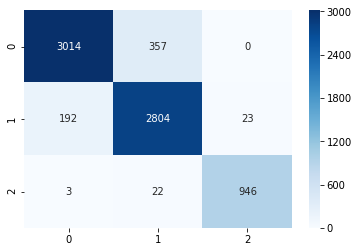

In [12]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

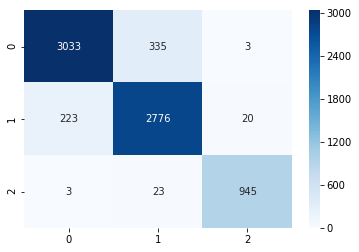

In [13]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

In [32]:
#抱存數據
import pickle
svm_model = model_4
#保存Model(注:save文件夹要预先建立，否则会报错)
with open('save/svm_model.pickle', 'wb') as f:
    pickle.dump(svm_model, f)

